In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import kstest
from scipy import stats

In [71]:
df = pd.read_csv('Canada_Office_Anaytical_File.csv')

In [72]:
df

,Region,Year,Class Type,ROI,Number of Buildings,Occupied,Absorption YTD,New Supply YTD,Direct Vacancy,Sublease Vacancy,Under Construction,Tenant Inducements
0,Montreal,2011,A,0.10,NaN,32303128.0,579560.0,187181.0,2307229.0,409036.0,634642.0,NaN
1,Montreal,2012,A,0.08,NaN,32309302.0,52555.0,353965.0,2609575.0,483135.0,1581613.0,NaN
2,Montreal,2013,A,0.08,NaN,32314695.0,5393.0,678781.0,2869355.0,896743.0,1730547.0,NaN
3,Montreal,2014,A,0.12,NaN,33492685.0,-241755.0,915071.0,4018696.0,1084792.0,1563967.0,NaN
4,Montreal,2015,A,0.12,NaN,33700015.0,-116627.0,630067.0,4477727.0,1019955.0,2130512.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vancouver,2016,C,0.40,156.0,5635742.0,-14516.0,0.0,432901.0,9746.0,0.0,7.4
276,Vancouver,2017,C,0.31,170.0,6387341.0,44374.0,0.0,356706.0,41567.0,0.0,7.3
277,Vancouver,2018,C,0.51,168.0,6333740.0,127227.0,0.0,253644.0,17402.0,0.0,0.0
278,Vancouver,2019,C,0.62,182.0,6690245.0,-272877.0,0.0,407085.0,117216.0,0.0,0.0


## 1. Data Preparation

In [73]:
df.dtypes

Region                  object
Year                     int64
Class Type              object
ROI                    float64
Number of Buildings    float64
Occupied               float64
Absorption YTD         float64
New Supply YTD         float64
Direct Vacancy         float64
Sublease Vacancy       float64
Under Construction     float64
Tenant Inducements     float64
dtype: object

The category variables need to be transformed into binary variables by creating dummy variables, in that way, all the variables will be numerical variables and can be analysis.

In [74]:
# Pandas provides a method to convert factors into dummy variables.
df = pd.get_dummies(df,columns=['Region','Class Type'], prefix_sep='_',drop_first=True)

In [75]:
df

,Year,ROI,Number of Buildings,Occupied,Absorption YTD,New Supply YTD,Direct Vacancy,Sublease Vacancy,Under Construction,Tenant Inducements,...,Region_Ottawa,Region_Toronto GTA,Region_Vancouver,Region_Winnipeg,Class Type_AA,Class Type_AAA,Class Type_B,Class Type_C,Class Type_C_D,Class Type_RC
0,2011,0.10,NaN,32303128.0,579560.0,187181.0,2307229.0,409036.0,634642.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2012,0.08,NaN,32309302.0,52555.0,353965.0,2609575.0,483135.0,1581613.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2013,0.08,NaN,32314695.0,5393.0,678781.0,2869355.0,896743.0,1730547.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.12,NaN,33492685.0,-241755.0,915071.0,4018696.0,1084792.0,1563967.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2015,0.12,NaN,33700015.0,-116627.0,630067.0,4477727.0,1019955.0,2130512.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2016,0.40,156.0,5635742.0,-14516.0,0.0,432901.0,9746.0,0.0,7.4,...,0,0,1,0,0,0,0,1,0,0
276,2017,0.31,170.0,6387341.0,44374.0,0.0,356706.0,41567.0,0.0,7.3,...,0,0,1,0,0,0,0,1,0,0
277,2018,0.51,168.0,6333740.0,127227.0,0.0,253644.0,17402.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
278,2019,0.62,182.0,6690245.0,-272877.0,0.0,407085.0,117216.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [76]:
#Look at descriptive statistics
df.describe()

,Year,ROI,Number of Buildings,Occupied,Absorption YTD,New Supply YTD,Direct Vacancy,Sublease Vacancy,Under Construction,Tenant Inducements,...,Region_Ottawa,Region_Toronto GTA,Region_Vancouver,Region_Winnipeg,Class Type_AA,Class Type_AAA,Class Type_B,Class Type_C,Class Type_C_D,Class Type_RC
count,280.000000,279.000000,202.000000,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.490000e+02,171.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2015.500000,0.252581,147.732673,1.387178e+07,8.102575e+04,1.809237e+05,1.511873e+06,3.278172e+05,5.993599e+05,18.436608,...,0.107143,0.142857,0.142857,0.107143,0.071429,0.035714,0.285714,0.214286,0.035714,0.071429
std,2.877424,0.345581,124.596854,1.708071e+07,5.081085e+05,3.969797e+05,1.591775e+06,5.153219e+05,1.388292e+06,10.854216,...,0.309849,0.350554,0.350554,0.309849,0.258001,0.185909,0.452563,0.411061,0.185909,0.258001
min,2011.000000,-0.500000,0.000000,5.985350e+05,-1.761020e+06,0.000000e+00,5.283900e+04,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.040000,64.000000,3.704288e+06,-8.152050e+04,0.000000e+00,4.258060e+05,3.155100e+04,0.000000e+00,10.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.500000,0.150000,128.000000,8.305064e+06,2.487700e+04,0.000000e+00,8.375370e+05,1.086550e+05,1.200000e+04,18.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,0.425000,197.750000,1.417291e+07,1.916190e+05,1.683950e+05,1.843872e+06,3.908130e+05,4.300000e+05,24.225000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2020.000000,1.830000,531.000000,9.406277e+07,2.873734e+06,3.539746e+06,7.276829e+06,3.237837e+06,9.189332e+06,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Now, we have finished the process of data preparation. The df database is useful with 280 records and 23 fields. All fields are numericals.**

## 2.Data Exploration and Reduction

**Correlation table & Heatmap**

In [77]:
#correlation matrix
corr=df.corr().round(2)

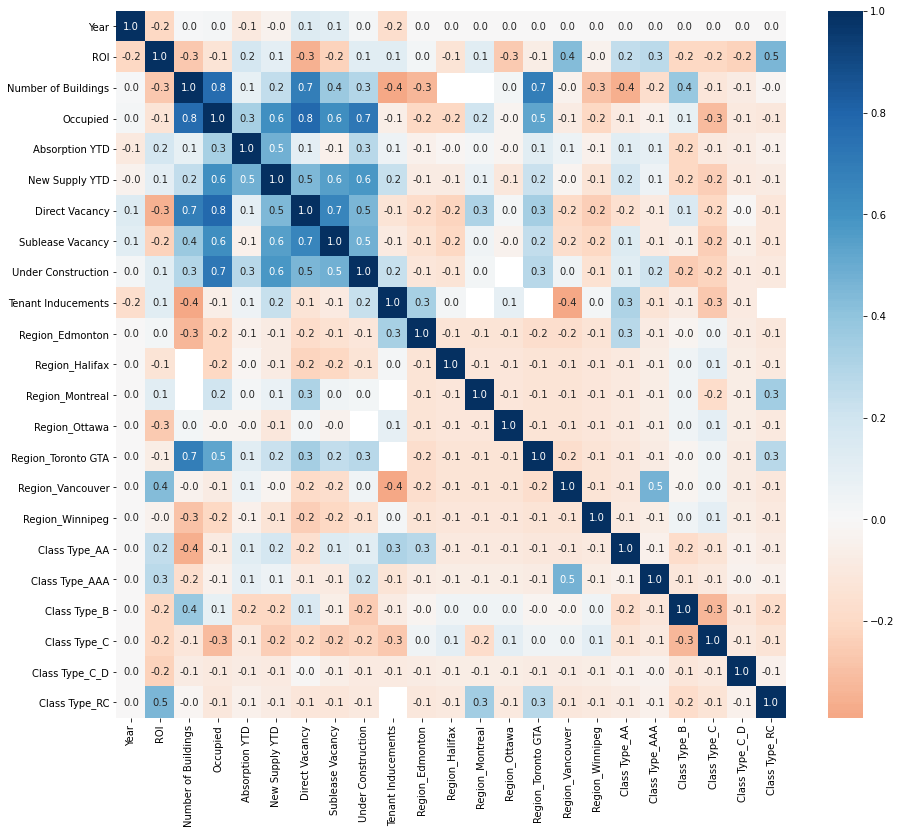

In [78]:
#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(15, 13)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.savefig("mycorr.png")

From the correlation matrix, we can explore the relationship between ROI and all independent variables, and we can find highly correlated independent variables pairs.

Based on the Correlation Analysis of previous report, we know that independent variables 'Region_Edmonton',' Region_Winnipeg', 'Region_Toronto GTA', 'New Supply YTD',and 'Under Construction' are irrelevant with target variables ROI, so we will drop them when developing the model.

In [79]:
#Remove certain variables from the onset (i.e., spending and sequence number)
Office_df = df.drop([ 'Region_Edmonton','Region_Winnipeg', 'Region_Toronto GTA', 
                     'New Supply YTD', 'Under Construction' ], axis=1)

In [80]:
Office_df.shape

(280, 18)

**After dropping the irrelevant variables, the office_df database is useful with 280 records and 18 fields, which are 17 independent variables and 1 target variable. All fields are numerical.**

## 3. Fitting a Regression Model 

## (1)use all 17 relevant independent variables to develop the original model.

In [81]:
## Import required packages
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [82]:
Office_df = Office_df.dropna(how='any')

In [83]:
X=Office_df.drop(columns=['ROI'])
y=Office_df['ROI']

In [84]:
# TRAINING(60%) AND VALIDATION(40%) - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

**Develope the Model using the Training Data**

In [85]:
#fit regression model
Office_lm = LinearRegression()
Office_lm.fit(train_X, train_y)

LinearRegression()

In [86]:
# print coefficients
print('intercept ', Office_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': Office_lm.coef_}))

intercept  60.57260021897571
              Predictor   coefficient
0                  Year -2.995061e-02
1   Number of Buildings -8.817031e-05
2              Occupied  4.515481e-08
3        Absorption YTD -1.519618e-07
4        Direct Vacancy -1.185631e-07
5      Sublease Vacancy -3.728509e-07
6    Tenant Inducements -2.393869e-03
7        Region_Halifax -1.110223e-16
8       Region_Montreal -2.775558e-17
9         Region_Ottawa -4.291838e-01
10     Region_Vancouver  1.912262e-01
11        Class Type_AA  3.943542e-01
12       Class Type_AAA  1.509297e-01
13         Class Type_B -1.164558e-01
14         Class Type_C -8.399703e-02
15       Class Type_C_D -3.134999e-01
16        Class Type_RC  0.000000e+00


In [87]:
# print performance measures (training data)
regressionSummary(train_y, Office_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.1377
     Mean Absolute Error (MAE) : 0.1078


**Make the Predictions for the Validation Data**

In [88]:
#Make the Predictions for the Validation Data(and show some residuals)
# Use predict() to make predictions on a new set
Office_lm_pred = Office_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': Office_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - Office_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, Office_lm_pred)

     Predicted  Actual  Residual
132   0.003389    0.20  0.196611
65    0.105825   -0.02 -0.125825
108   0.316394    0.11 -0.206394
35    0.531145    0.52 -0.011145
66    0.010654   -0.03 -0.040654
268   0.654056    0.64 -0.014056
111   0.906322    0.90 -0.006322
47   -0.017557    0.12  0.137557
269   0.560232    0.66  0.099768
267   0.674658    0.48 -0.194658
123   0.332264    0.35  0.017736
262   0.736633    0.50 -0.236633
277   0.454786    0.51  0.055214
126  -0.349772   -0.31  0.039772
110   0.754679    0.65 -0.104679
105   0.316605    0.03 -0.286605
102   1.074391    1.08  0.005609
79    0.261307   -0.06 -0.321307
46    0.033915    0.14  0.106085
101   0.831056    1.18  0.348944

Regression statistics

                      Mean Error (ME) : -0.0267
       Root Mean Squared Error (RMSE) : 0.2021
            Mean Absolute Error (MAE) : 0.1484
          Mean Percentage Error (MPE) : 38.9170
Mean Absolute Percentage Error (MAPE) : 138.2277


## (2) Modify the model with predictors selecting.

**Use subset selection algorithms to reduce the remaining predictors.**

**a. Backward**

In [89]:
#backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Number of Buildings, Occupied, Absorption YTD, Direct Vacancy, Sublease Vacancy, Tenant Inducements, Region_Halifax, Region_Montreal, Region_Ottawa, Region_Vancouver, Class Type_AA, Class Type_AAA, Class Type_B, Class Type_C, Class Type_C_D, Class Type_RC
Start: score=-51.12
Step: score=-53.12, remove Class Type_RC
Step: score=-55.12, remove Region_Halifax
Step: score=-57.12, remove Region_Montreal
Step: score=-59.11, remove Number of Buildings
Step: score=-59.69, remove Class Type_C
Step: score=-61.02, remove Tenant Inducements
Step: score=-61.02, remove None
['Year', 'Occupied', 'Absorption YTD', 'Direct Vacancy', 'Sublease Vacancy', 'Region_Ottawa', 'Region_Vancouver', 'Class Type_AA', 'Class Type_AAA', 'Class Type_B', 'Class Type_C_D']


In [90]:
# Compute common accuracy measures
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0351
       Root Mean Squared Error (RMSE) : 0.1998
            Mean Absolute Error (MAE) : 0.1533
          Mean Percentage Error (MPE) : 30.3339
Mean Absolute Percentage Error (MAPE) : 140.3577


**b. Forward Elimination**

In [91]:
#The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Number of Buildings, Occupied, Absorption YTD, Direct Vacancy, Sublease Vacancy, Tenant Inducements, Region_Halifax, Region_Montreal, Region_Ottawa, Region_Vancouver, Class Type_AA, Class Type_AAA, Class Type_B, Class Type_C, Class Type_C_D, Class Type_RC
Start: score=67.81, constant
Step: score=36.33, add Region_Vancouver
Step: score=9.58, add Direct Vacancy
Step: score=-2.64, add Class Type_C
Step: score=-17.19, add Class Type_C_D
Step: score=-26.79, add Year
Step: score=-38.60, add Class Type_AA
Step: score=-42.16, add Class Type_B
Step: score=-42.34, add Sublease Vacancy
Step: score=-51.44, add Occupied
Step: score=-53.08, add Absorption YTD
Step: score=-56.28, add Region_Ottawa
Step: score=-59.56, add Class Type_AAA
Step: score=-59.56, add None
['Region_Vancouver', 'Direct Vacancy', 'Class Type_C', 'Class Type_C_D', 'Year', 'Class Type_AA', 'Class Type_B', 'Sublease Vacancy', 'Occupied', 'Absorption YTD', 'Region_Ottawa', 'Class Type_AAA']


In [92]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0297
       Root Mean Squared Error (RMSE) : 0.1968
            Mean Absolute Error (MAE) : 0.1493
          Mean Percentage Error (MPE) : 28.8433
Mean Absolute Percentage Error (MAPE) : 137.8864


**c. stepwise**

In [93]:
#In some other cases, Except at each step, also consider dropping non-significant predictors
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Number of Buildings, Occupied, Absorption YTD, Direct Vacancy, Sublease Vacancy, Tenant Inducements, Region_Halifax, Region_Montreal, Region_Ottawa, Region_Vancouver, Class Type_AA, Class Type_AAA, Class Type_B, Class Type_C, Class Type_C_D, Class Type_RC
Start: score=67.81, constant
Step: score=36.33, add Region_Vancouver
Step: score=9.58, add Direct Vacancy
Step: score=-2.64, add Class Type_C
Step: score=-17.19, add Class Type_C_D
Step: score=-26.79, add Year
Step: score=-38.60, add Class Type_AA
Step: score=-42.16, add Class Type_B
Step: score=-42.34, add Sublease Vacancy
Step: score=-51.44, add Occupied
Step: score=-53.08, add Absorption YTD
Step: score=-56.28, add Region_Ottawa
Step: score=-59.56, add Class Type_AAA
Step: score=-61.02, remove Class Type_C
Step: score=-61.02, unchanged None
['Region_Vancouver', 'Direct Vacancy', 'Class Type_C_D', 'Year', 'Class Type_AA', 'Class Type_B', 'Sublease Vacancy', 'Occupied', 'Absorption YTD', 'Region_Ottawa', 'Class Type_

In [94]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.0351
       Root Mean Squared Error (RMSE) : 0.1998
            Mean Absolute Error (MAE) : 0.1533
          Mean Percentage Error (MPE) : 30.3339
Mean Absolute Percentage Error (MAPE) : 140.3577


**After Use three subset selection algorithms to reduce the remaining predictors, we can see that Forward Elimination performs best based on theMAPE.**

**In the Forward Elimination, the MAPE=137.8864, which are the lowest among three ways and also lower than that of the model using all 17 independent variables with MAPE=138.2277, so we will select the predictors from Forward Elimination to develop the final model.**

**Therefore, there are 12 independent variables to predict the target variable ROI, which are 'Region_Vancouver', 'Direct Vacancy', 'Class Type_C', 'Class Type_C_D', 'Year', 'Class Type_AA', 'Class Type_B', 'Sublease Vacancy', 'Occupied', 'Absorption YTD', 'Region_Ottawa', 'Class Type_AAA'.**

## (3) Use 12 selected independent variables to develop the best model.

In [95]:
New_df = Office_df[[ 'Region_Vancouver', 'Direct Vacancy', 'Class Type_C', 'Class Type_C_D', 'Year', 'Class Type_AA', 
                    'Class Type_B', 'Sublease Vacancy', 'Occupied', 'Absorption YTD', 'Region_Ottawa', 'Class Type_AAA', 'ROI']]

In [96]:
New_df.columns = [c.replace(' ', '_') for c in New_df.columns]

In [97]:
New_df

,Region_Vancouver,Direct_Vacancy,Class_Type_C,Class_Type_C_D,Year,Class_Type_AA,Class_Type_B,Sublease_Vacancy,Occupied,Absorption_YTD,Region_Ottawa,Class_Type_AAA,ROI
30,0,454889.0,0,0,2011,1,0,23789.0,3554759.0,379852.0,0,0,0.93
31,0,372353.0,0,0,2012,1,0,16346.0,3644738.0,89979.0,0,0,1.08
32,0,398635.0,0,0,2013,1,0,15982.0,3618820.0,-25918.0,0,0,0.87
33,0,381295.0,0,0,2014,1,0,11730.0,2616417.0,19048.0,0,0,0.47
34,0,335238.0,0,0,2015,1,0,38441.0,2657385.0,19346.0,0,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,432901.0,1,0,2016,0,0,9746.0,5635742.0,-14516.0,0,0,0.40
276,1,356706.0,1,0,2017,0,0,41567.0,6387341.0,44374.0,0,0,0.31
277,1,253644.0,1,0,2018,0,0,17402.0,6333740.0,127227.0,0,0,0.51
278,1,407085.0,1,0,2019,0,0,117216.0,6690245.0,-272877.0,0,0,0.62


In [98]:
X = New_df.drop(columns=['ROI'])
y = New_df['ROI']

In [99]:
# TRAINING(60%) AND VALIDATION(40%) - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [100]:
#fit regression model
Best_lm = LinearRegression()
Best_lm.fit(train_X, train_y)

LinearRegression()

In [101]:
# print coefficients
print('intercept ', Best_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': Best_lm.coef_}))

intercept  58.35984425402857
           Predictor   coefficient
0   Region_Vancouver  2.156055e-01
1     Direct_Vacancy -1.181922e-07
2       Class_Type_C -5.174736e-02
3     Class_Type_C_D -2.824163e-01
4               Year -2.888933e-02
5      Class_Type_AA  3.914065e-01
6       Class_Type_B -1.009029e-01
7   Sublease_Vacancy -3.406550e-07
8           Occupied  4.394050e-08
9     Absorption_YTD -1.330271e-07
10     Region_Ottawa -4.274234e-01
11    Class_Type_AAA  1.725531e-01


In [102]:
# print performance measures (training data)
regressionSummary(train_y, Best_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.1390
     Mean Absolute Error (MAE) : 0.1082


In [103]:
#Make the Predictions for the Validation Data(and show some residuals)
# Use predict() to make predictions on a new set
Best_lm_pred = Best_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': Best_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - Best_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, Best_lm_pred)

     Predicted  Actual  Residual
132   0.012204    0.20  0.187796
65    0.106739   -0.02 -0.126739
108   0.285757    0.11 -0.175757
35    0.468101    0.52  0.051899
66    0.016277   -0.03 -0.046277
268   0.650869    0.64 -0.010869
111   0.892010    0.90  0.007990
47    0.024112    0.12  0.095888
269   0.553899    0.66  0.106101
267   0.668590    0.48 -0.188590
123   0.343457    0.35  0.006543
262   0.738733    0.50 -0.238733
277   0.450504    0.51  0.059496
126  -0.352374   -0.31  0.042374
110   0.757524    0.65 -0.107524
105   0.394871    0.03 -0.364871
102   1.100361    1.08 -0.020361
79    0.250839   -0.06 -0.310839
46    0.055370    0.14  0.084630
101   0.895097    1.18  0.284903

Regression statistics

                      Mean Error (ME) : -0.0297
       Root Mean Squared Error (RMSE) : 0.1968
            Mean Absolute Error (MAE) : 0.1493
          Mean Percentage Error (MPE) : 28.8433
Mean Absolute Percentage Error (MAPE) : 137.8864


In [104]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)
predictors = train_X.columns
formula = 'ROI ~ ' + ' + '.join(predictors)
Best_lm = sm.ols(formula=formula, data=train_df).fit()
Best_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.87
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           8.05e-23
Time:                        17:38:57   Log-Likelihood:                 43.780
No. Observations:                  79   AIC:                            -61.56
Df Residuals:                      66   BIC:                            -30.76
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           58.3598     13.428      4.346      0.000      31.550      85.169
Region_Vancouver     0.2156      0.067      3.242      0.002       0.083       0.348
Direct_Vacancy   -1.182e-07   2.38e-08     -4.974      0.000   -1.66e-07   -7.07e-08
Class_Type_C        -0.0517      0.077     -0.676      0.501      -0.205       0.101
Class_Type_C_D      -0.2824      0.087     -3.251      0.002      -0.456      -0.109
Year                -0.0289      0.007     -4.336      0.000      -0.042      -0.016
Class_Type_AA        0.3914      0.076      5.130      0.000       0.239       0.544
Class_Type_B        -0.1009      0.054     -1.877      0.065      -0.208       0.006
Sublease_Vacancy -3.407e-07   7.09e-08     -4.808      0.000   -4.82e-07   -1.99e-07
Occupied          4.394e-08   9.03e-09      4.867      0.000    2.59e-08     6.2e-08
Absorption_YTD    -1.33e-07   5.35e-08     -2.485      0.015    -2.4e-07   -2.62e-08
Region_Ottawa       -0.4274      0.176     -2.425      0.018      -0.779      -0.075
Class_Type_AAA       0.1726      0.081      2.135      0.036       0.011       0.334
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.323
Skew:                           0.050   Prob(JB):                        0.851
Kurtosis:                       3.297   Cond. No.                     7.72e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The result illustrates that the R Square equals 0.853, which is a very good fit. 85.3% of the variation in target variable 'ROI' is explained by the 12 independent variables, the Significance F is less than 0.05, so the model is fit well.**

**Therefore, we use this model to form a final model variable report.**

## 4.Validating The Model Performance

In [105]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

**Decile and Gains Char**

In [106]:
# reorder the predicted values in descending order and calculate the cumulative sum
pred_v = pd.Series(Best_lm.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)
pred_v

102    1.100361
101    0.895097
111    0.892010
103    0.871359
240    0.863911
250    0.820594
261    0.765708
110    0.757524
262    0.738733
32     0.706924
263    0.694330
246    0.682014
267    0.668590
264    0.663128
255    0.660199
268    0.650869
245    0.646746
266    0.636476
265    0.632227
270    0.610309
112    0.608464
34     0.600720
269    0.553899
42     0.504279
273    0.502782
35     0.468101
113    0.459880
277    0.450504
105    0.394871
123    0.343457
220    0.311835
108    0.285757
79     0.250839
224    0.232501
61     0.223602
63     0.193735
124    0.188639
233    0.168919
65     0.106739
46     0.055370
130    0.038845
47     0.024112
66     0.016277
132    0.012204
69    -0.019310
119   -0.090437
116   -0.143368
135   -0.174378
137   -0.277675
115   -0.308764
126   -0.352374
139   -0.360649
99    -0.931525
dtype: float64

Text(0.5, 1.0, 'Cumulative Gains Chart')

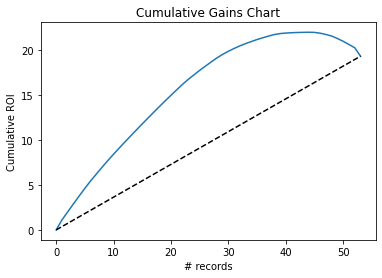

In [107]:
ax = gainsChart(pred_v)
ax.set_ylabel('Cumulative ROI')
ax.set_title('Cumulative Gains Chart')

Text(0, 0.5, 'Lift')

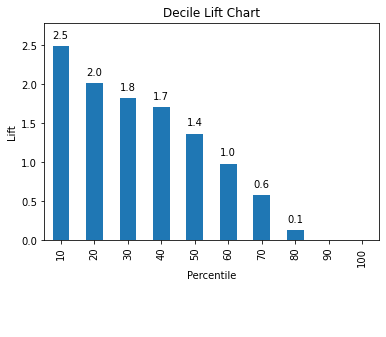

In [108]:
ax = liftChart(pred_v)
ax.set_ylabel('Lift')

**From the Decile and Gains Char, we can see that the ROI with the model is higher than that of without the model(randomly).**

**Therefore, The model performs well. We can use it to predict the ROI of new data.**